# Area of interest (AOI)

In this section, we will find and request a pre-defined area of interest (AOI) and use it to initiate a Environmental Intelligence (EI): Geospatial APIs raster query.

In order to run this notebook, `ibmpairs`, `geopandas`, `geoplot`, `numpy` and `matplotlib` must be installed to your python environment using your package manager of choice, e.g. with pip:

```
pip install ibmpairs geopandas geoplot numpy matplotlib
```

## Search for an AOI

An AOI, in Geospatial APIs, is a pre-defined labelled spatial definition that can be specified as the spatial extent (area) of a raster query; usually a jurisdiction (e.g. country, state etc).

To use an AOI in a raster query, we must find an area that we wish to query; to do so, we can use the SDK method `query.search_aois`:

In [ ]:
%pip install configparser
%pip install ibmpairs
%pip install matplotlib
%pip install geoplot
%pip install geopandas

In [1]:
import os
import json
import ibmpairs.query as query
import ibmpairs.client as client

import geopandas
import geoplot
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt

import configparser

config = configparser.RawConfigParser()
config.read('../../../auth/secrets.ini')
# Best practice is not to include secrets in source code so we read
# an api key, tenant id and org id from a secrets.ini file.
# You could set the credentials in-line here but we don't
# recommend it for security reasons.

EI_API_KEY    = config.get('EI', 'api.api_key')
EI_TENANT_ID  = config.get('EI', 'api.tenant_id') 
EI_ORG_ID     = config.get('EI', 'api.org_id') 

# Authenticate and get a client object.
ei_client = client.get_client(api_key   = EI_API_KEY,
                              tenant_id = EI_TENANT_ID,
                              org_id    = EI_ORG_ID)

# Search for AOIs that contain the word 'texas'
aois_list = query.search_aois('texas')
aois_list

2024-07-31 17:12:53 - paw - INFO - The client authentication method is assumed to be OAuth2.
2024-07-31 17:12:53 - paw - INFO - Legacy Environment is False
2024-07-31 17:12:53 - paw - INFO - The authentication api key type is assumed to be IBM Cloud IAM, because the api key prefix 'PHX' is not present.
2024-07-31 17:12:56 - paw - INFO - Authentication success.
2024-07-31 17:12:56 - paw - INFO - HOST: https://api.ibm.com/geospatial/run/na/core/v3


,id,key,name
0,51575,missouri.texas,Missouri.Texas
1,52132,oklahoma.texas,Oklahoma.Texas
2,52653,texas.anderson,Texas.Anderson
3,52558,texas.andrews,Texas.Andrews
4,52661,texas.angelina,Texas.Angelina
...,...,...,...
509,52553,texas.yoakum,Texas.Yoakum
510,52595,texas.young,Texas.Young
511,52769,texas.zapata,Texas.Zapata
512,52758,texas.zavala,Texas.Zavala


The search includes the results that contain the word `texas`; the `usa-texas` key represents the AOI of the state of Texas (USA), the `texas.*` entries represent the counties of the state of Texas.

To get the metadata information about the `usa-texas` area of interest (id: 164) it can be requested with `query.get_aoi`.

In [2]:
texas_id = int(aois_list.loc[aois_list['key'] == 'usa-texas', 'id'].iloc[0])
texas = query.get_aoi(texas_id)
texas

2024-07-31 17:12:58 - paw - INFO - {'created_at': 1688045740309, 'updated_at': 1707501884480, 'id': 164, 'key': 'usa-texas', 'name': 'USA - Texas', 'geojson': '{"type":"Polygon","coordinates":[[[-106.683192366,31.942887307],[-106.623555771,32.051088309],[-103.106759183,32.052422446],[-103.069255984,36.518767545],[-100.001664892,36.543596825],[-99.947481351,34.629539979],[-99.666860972,34.42584217],[-99.443502852,34.421964197],[-99.35225105,34.498731218],[-99.168595192,34.365424006],[-99.151419194,34.258301545],[-98.617954477,34.207820825],[-98.45306249,34.106891538],[-98.364816544,34.190188117],[-98.09945857,34.196541332],[-98.046652334,34.041269506],[-97.952756011,34.041201779],[-97.864138897,33.907847955],[-97.676628909,34.038434165],[-97.405805152,33.873028749],[-97.212875245,33.955774758],[-97.038044097,33.898091427],[-96.926673431,34.011772333],[-96.735380541,33.884608678],[-96.680475368,33.961655112],[-96.564887797,33.942126555],[-96.337457867,33.777559085],[-95.955516065,33.9385

{
    "bbox": [
        25.795808134,
        -106.683192366,
        36.543596825,
        -93.457684889
    ],
    "geojson": "{\"type\":\"Polygon\",\"coordinates\":[[[-106.683192366,31.942887307],[-106.623555771,32.051088309],[-103.106759183,32.052422446],[-103.069255984,36.518767545],[-100.001664892,36.543596825],[-99.947481351,34.629539979],[-99.666860972,34.42584217],[-99.443502852,34.421964197],[-99.35225105,34.498731218],[-99.168595192,34.365424006],[-99.151419194,34.258301545],[-98.617954477,34.207820825],[-98.45306249,34.106891538],[-98.364816544,34.190188117],[-98.09945857,34.196541332],[-98.046652334,34.041269506],[-97.952756011,34.041201779],[-97.864138897,33.907847955],[-97.676628909,34.038434165],[-97.405805152,33.873028749],[-97.212875245,33.955774758],[-97.038044097,33.898091427],[-96.926673431,34.011772333],[-96.735380541,33.884608678],[-96.680475368,33.961655112],[-96.564887797,33.942126555],[-96.337457867,33.777559085],[-95.955516065,33.938561937],[-95.839855327,33.

In order to check the AOI has the desired shape, it can be loaded into a geopandas dataframe and plotted with geoplot:

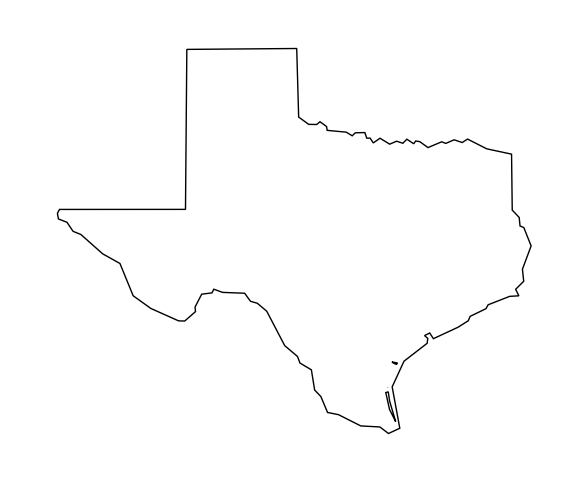

In [3]:
texas_geopandas = geopandas.read_file(texas.geojson, driver='GeoJSON')
gx = geoplot.polyplot(texas_geopandas.geometry)

## Query with an AOI

Once it has been verified that the AOI is of the desired location for the query, we can run a raster query (see [Quick Start- Raster Query](raster_query.ipynb)) with the texas AOI id as the specified spatial definition:

In [4]:
# ERA 5 Temperature query for Texas
ERA5_texas_query_json = {
  "layers": [
    {
      "id": "49423",
      "type": "raster"
    }
  ],
  "name": "ERA5 1h Query for Texas for 2024-04-01",
  "spatial": {
    "aoi": texas_id,
    "type": "poly"
  },
  "temporal": {
    "intervals": [
      {
        "start": "2024-04-01T00:00:00Z",
        "end": "2024-04-01T00:00:00Z"
      }
    ]
  }
}

ERA5_texas_query_result = query.submit_check_status_and_download(ERA5_texas_query_json)

2024-07-31 17:12:58 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2024-07-31 17:12:59 - paw - INFO - The query was successfully submitted with the id: 1722427200_15179013.
2024-07-31 17:12:59 - paw - INFO - The query 1722427200_15179013 has the status Queued.
2024-07-31 17:13:30 - paw - INFO - The query 1722427200_15179013 has the status Succeeded.
2024-07-31 17:13:30 - paw - INFO - The query 1722427200_15179013 was successful after checking the status.
2024-07-31 17:14:01 - paw - INFO - The query 1722427200_15179013 has the status Succeeded.
2024-07-31 17:14:01 - paw - INFO - The query 1722427200_15179013 was successful after checking the status.
2024-07-31 17:14:01 - paw - INFO - The query download folder is set to the path /ibmpairs/download/.
2024-07-31 17:14:02 - paw - INFO - The query 1722427200_15179013 is a zip.
2024-07-31 17:14:02 - paw - INFO - The query file for 1722427200_15179013 will be downloaded to the following path /ibmpairs/download/1722427200_15179

In [5]:
# Find layer files to load from downloaded zip.
files = ERA5_texas_query_result.list_files()

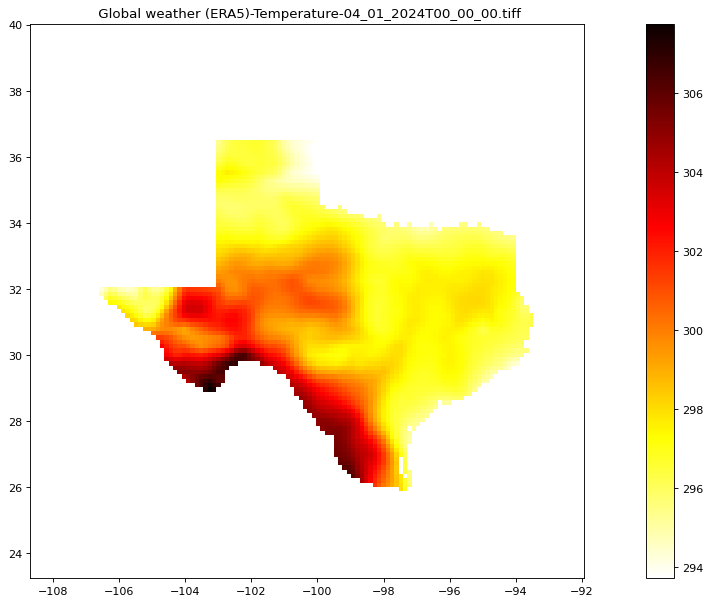

In [6]:
# Display the resulting image
for file in files:
    if file.endswith('.tiff'):
        with open(file+'.json', 'r') as metadata_file:
            metadata = json.load(metadata_file)
        bbox=metadata["boundingBox"]
        extent=[bbox["minLongitude"],
                bbox["maxLongitude"],
                bbox["minLatitude"],
                bbox["maxLatitude" ]]  
        array_tiff = np.array(PIL.Image.open(file))
        plt.figure(figsize = (20, 9), dpi=80)
        vmin = metadata["rasterStatistics"]["pixelMin"]
        vmax = metadata["rasterStatistics"]["pixelMax"]
        plt.imshow(array_tiff,
                   cmap = 'hot_r', 
                   vmin=vmin, 
                   vmax=vmax,
                   extent = extent)
        plt.colorbar()
        plt.title(" " + os.path.basename(file))

The query result, above, illustrates the temperature in Kelvin for 2024-04-01 at 00:00:00 across the state of Texas.